In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 

%matplotlib inline

In [2]:
data = pd.read_csv('../data/glicko.csv')

In [3]:
data

,date,season,neutral,playoff,team1,team2,elo1_pre,elo2_pre,elo_prob1,elo_prob2,...,elo_asym,outcome,point_sum,point_diff,point_asym,glicko_rating1,glicko_rating2,glicko_dev1,glicko_dev2,glicko_prob1
0,1960-09-09,1960,0,NaN,NE,DEN,1300.000000,1300.000000,0.592466,0.407534,...,0.000000,0,23.0,-3.0,-0.130435,1337.788294,1662.211706,290.230948,290.230948,0.500000
1,1960-09-10,1960,0,NaN,LAC,KC,1300.000000,1300.000000,0.592466,0.407534,...,0.000000,1,41.0,1.0,0.024390,1662.211706,1337.788294,290.230948,290.230948,0.500000
2,1960-09-11,1960,0,NaN,OAK,TEN,1300.000000,1300.000000,0.592466,0.407534,...,0.000000,0,59.0,-15.0,-0.254237,1337.788294,1662.211706,290.230948,290.230948,0.500000
3,1960-09-11,1960,0,NaN,NYJ,BUF,1300.000000,1300.000000,0.592466,0.407534,...,0.000000,1,30.0,24.0,0.800000,1662.211706,1337.788294,290.230948,290.230948,0.500000
4,1960-09-16,1960,0,NaN,OAK,KC,1266.146000,1294.513000,0.552525,0.447475,...,-0.011078,0,50.0,-18.0,-0.360000,1207.738526,1467.838063,248.063923,248.063923,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13333,2019-10-13,2019,0,NaN,NYJ,DAL,1332.198379,1546.618451,0.297312,0.702688,...,-0.074482,1,46.0,2.0,0.043478,1275.046773,1513.815459,157.781957,140.706084,0.086560
13334,2019-10-13,2019,0,NaN,DEN,TEN,1432.368369,1512.748820,0.477880,0.522120,...,-0.027293,1,16.0,16.0,1.000000,1377.106649,1399.779065,139.175597,130.157061,0.306618
13335,2019-10-13,2019,0,NaN,LAC,PIT,1534.607030,1520.922198,0.611340,0.388660,...,0.004479,0,41.0,-7.0,-0.170732,1440.065547,1502.027274,135.787933,130.124605,0.553557
13336,2019-10-14,2019,0,NaN,GB,DET,1534.510860,1511.947505,0.623412,0.376588,...,0.007406,1,45.0,1.0,0.022222,1664.146506,1554.639684,133.186521,141.799505,0.518816


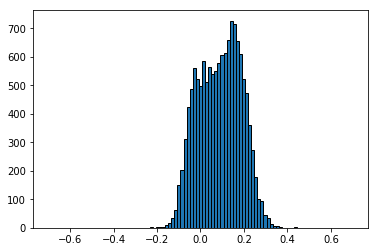

In [4]:
plt.hist(data['elo_prob1'] - data['glicko_prob1'], bins=np.linspace(-0.7, 0.7, 100), edgecolor='k');

In [5]:
pats = data[data['team1'] == 'NE']

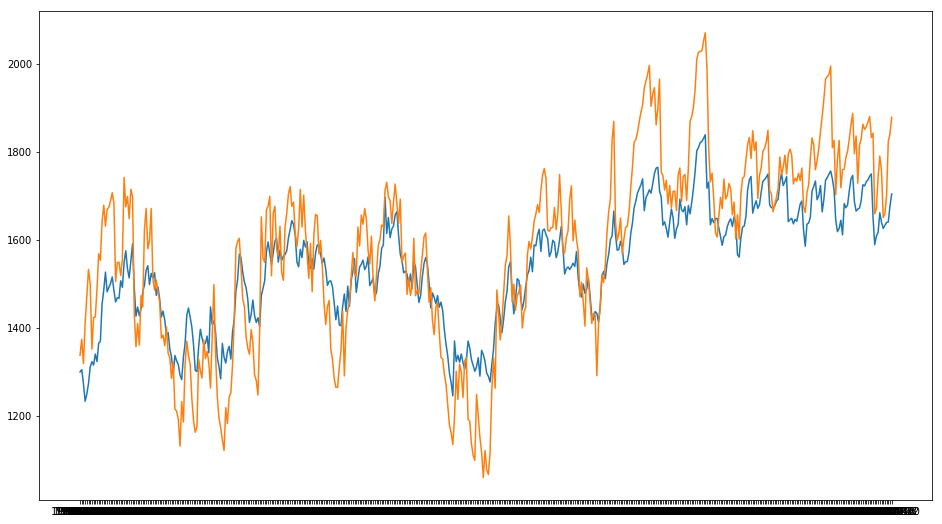

In [6]:
plt.figure(figsize=(16,9))
plt.plot(pats['date'], pats['elo1_pre'])
plt.plot(pats['date'], pats['glicko_rating1'])

In [7]:
valid_data = data[data['season'] > 2015]

In [8]:
valid_data['elo_prediction'] = np.round(valid_data['elo_prob1'], 0)
valid_data['glicko_prediction'] = np.round(valid_data['glicko_prob1'], 0)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
from sklearn.metrics import accuracy_score

In [10]:
accuracy_score(valid_data['outcome'], valid_data['elo_prediction'])

0.6344206974128234

In [11]:
accuracy_score(valid_data['outcome'], valid_data['glicko_prediction'])

0.608548931383577

In [13]:
def reward(pred, outcome):
    return np.sum(25 - 100 * (pred - outcome)**2)

In [44]:
reward(valid_data['elo_prob1'], valid_data['outcome'])

2526.4022425462904

In [45]:
reward(valid_data['glicko_prob1'], valid_data['outcome'])

827.2481468150723

In [38]:
def bce(pred, outcome):
    win_idx = np.where(outcome == 1)[0]
    lose_idx = np.where(outcome == 0)[0] 
    return -1 * np.sum(np.log(pred[lose_idx])) - np.sum(np.log(1-pred[win_idx]))

In [39]:
bce(valid_data['elo_prob1'].values, valid_data['outcome'].values)

819.1012289350099

In [40]:
bce(valid_data['glicko_prob1'].values, valid_data['outcome'].values)

913.1771962089581

In [41]:
from sklearn.metrics import mean_squared_error

In [42]:
mean_squared_error(valid_data['elo_prob1'].values, valid_data['outcome'].values)

0.2215815270804692

In [43]:
mean_squared_error(valid_data['glicko_prob1'].values, valid_data['outcome'].values)

0.24069462152064036